In [ ]:
import torch
import numpy as np

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

In [ ]:
import hsup as _
import gymnasium as gym

import dataset.preprocess as preprocess
import dataset.simulation as simulation
import dataset.data as data


In [ ]:

model_sec_back_t = simulation.MLPModel.load_from_checkpoint("lightning_logs/split.sec_back_t/checkpoints/epoch=816-step=90687.ckpt")
model_indoor = simulation.MLPModel.load_from_checkpoint("lightning_logs/split.indoor/checkpoints/epoch=814-step=90465.ckpt")

model_sec_back_t.eval()
model_indoor.eval()

env = gym.make(
    "hsup/HeatSupply",
    max_episode_steps=24 * 6,
    data=data.train_data,
    model_sec_back_t=model_sec_back_t,    
    model_indoor=model_indoor,
    # discretize=True,
)


In [ ]:
from stable_baselines3 import DQN, PPO, SAC

MODEL = SAC
TOTAL_TIMESTEPS = int(5e4)
LOG_INTERVAL = 1


In [ ]:
model = MODEL("MlpPolicy", env, verbose=1, tensorboard_log="./runs", seed=0)
model.learn(total_timesteps=TOTAL_TIMESTEPS, progress_bar=True, log_interval=LOG_INTERVAL)
model.save(f"checkpoints/{MODEL.__name__}-{TOTAL_TIMESTEPS}")


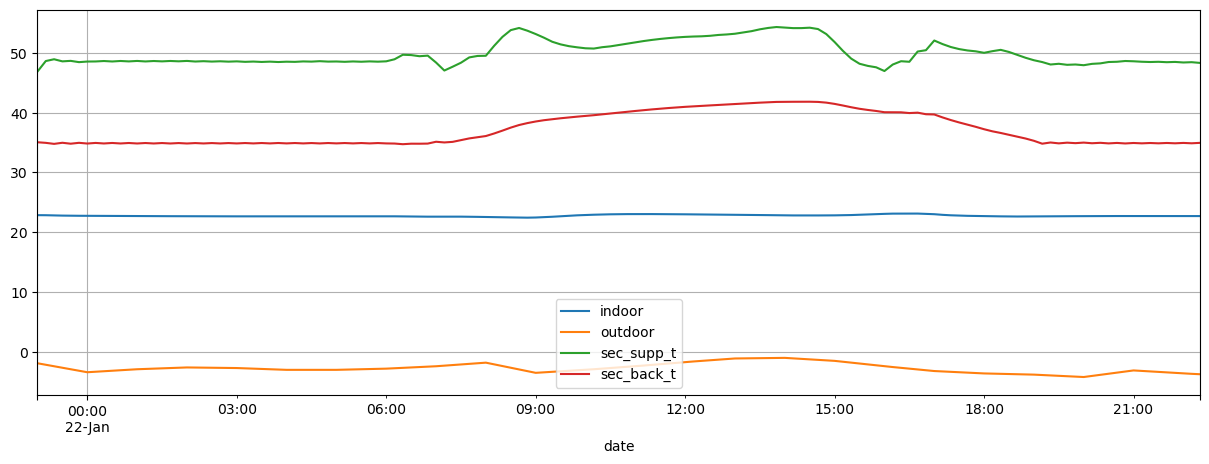

In [7]:
model = MODEL.load(f"checkpoints/{MODEL.__name__}-{TOTAL_TIMESTEPS}")

obs, _ = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, trunc, _ = env.step(action)
    if trunc or done:
        break
    
env.plot()